# 차분(Differencing) 과 이동평균(MA) - Simple Trade Strategy

In [30]:
# !pip install pandas_datareader
#!pip install yfinance

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader as data_reader

## Price difference (익일 종가 - 당일 종가)

PriceDiff = (Close Price of tomorrow - Close Price of today)

- shift(period)

In [4]:
fb = data_reader.DataReader("FB", data_source="yahoo")    #Facebook
ms = data_reader.DataReader("MSFT", data_source="yahoo")  #Microsoft

In [5]:
fb.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-24,145.669998,144.339996,144.960007,145.470001,14407200,145.470001
2017-04-25,147.149994,145.789993,145.789993,146.490005,17767500,146.490005
2017-04-26,147.589996,146.089996,147.089996,146.559998,12395000,146.559998
2017-04-27,147.750000,146.139999,146.669998,147.699997,11275100,147.699997
2017-04-28,151.529999,149.070007,149.500000,150.250000,30652200,150.250000


In [6]:
fb.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1, inplace=True)
ms.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [7]:
fb['Yesterday Close'] = fb['Close'].shift(1)
fb.head()

,Close,Yesterday Close
Date,,
2017-04-24,145.470001,NaN
2017-04-25,146.490005,145.470001
2017-04-26,146.559998,146.490005
2017-04-27,147.699997,146.559998
2017-04-28,150.250000,147.699997


In [8]:
#Price Difference - manual 계산
fb['Price Difference'] = fb['Close'] - fb['Yesterday Close']
fb.head()

,Close,Yesterday Close,Price Difference
Date,,,
2017-04-24,145.470001,NaN,NaN
2017-04-25,146.490005,145.470001,1.020004
2017-04-26,146.559998,146.490005,0.069992
2017-04-27,147.699997,146.559998,1.139999
2017-04-28,150.250000,147.699997,2.550003


In [9]:
#diff() method 사용해도 동일한 결과
fb['Price Diff2'] = fb['Close'].diff()
fb.head()

,Close,Yesterday Close,Price Difference,Price Diff2
Date,,,,
2017-04-24,145.470001,NaN,NaN,NaN
2017-04-25,146.490005,145.470001,1.020004,1.020004
2017-04-26,146.559998,146.490005,0.069992,0.069992
2017-04-27,147.699997,146.559998,1.139999,1.139999
2017-04-28,150.250000,147.699997,2.550003,2.550003


In [10]:
ms['Yesterday Close'] = ms['Close'].shift(1)
ms['Price Difference'] = ms['Close'].diff()
ms.head()

,Close,Yesterday Close,Price Difference
Date,,,
2017-04-24,67.529999,NaN,NaN
2017-04-25,67.919998,67.529999,0.389999
2017-04-26,67.830002,67.919998,-0.089996
2017-04-27,68.269997,67.830002,0.439995
2017-04-28,68.459999,68.269997,0.190002


In [11]:
print(ms['Price Difference'].loc['2017-11-03'])

0.089996337890625


In [13]:
ms.head()

,Close,Yesterday Close,Price Difference
Date,,,
2017-04-24,67.529999,NaN,NaN
2017-04-25,67.919998,67.529999,0.389999
2017-04-26,67.830002,67.919998,-0.089996
2017-04-27,68.269997,67.830002,0.439995
2017-04-28,68.459999,68.269997,0.190002


차분한 값으로부터 원래의 값 복원하기

In [15]:
ms['Price Difference'].cumsum() + ms['Close'][0]

Date
2017-04-24           NaN
2017-04-25     67.919998
2017-04-26     67.830002
2017-04-27     68.269997
2017-04-28     68.459999
                 ...    
2022-04-18    280.519989
2022-04-19    285.299988
2022-04-20    286.359985
2022-04-21    280.809998
2022-04-22    274.029999
Name: Price Difference, Length: 1260, dtype: float64

## 일일 수익률 계산

- 1 주를 계속 보유하였다고 가정.  


- 계산 방법. 

- Daily Return = df/df.shift(1) - 1  
    or
- Daily Return[1:] = df[1:] / df[:-1].values - 1  
    or    
- Daily Return = df.pct_chage()

In [16]:
ms['Return'] = ms['Close'] / ms['Yesterday Close'] - 1
ms.head()

,Close,Yesterday Close,Price Difference,Return
Date,,,,
2017-04-24,67.529999,NaN,NaN,NaN
2017-04-25,67.919998,67.529999,0.389999,0.005775
2017-04-26,67.830002,67.919998,-0.089996,-0.001325
2017-04-27,68.269997,67.830002,0.439995,0.006487
2017-04-28,68.459999,68.269997,0.190002,0.002783


In [17]:
ms.tail()

,Close,Yesterday Close,Price Difference,Return
Date,,,,
2022-04-18,280.519989,279.829987,0.690002,0.002466
2022-04-19,285.299988,280.519989,4.779999,0.017040
2022-04-20,286.359985,285.299988,1.059998,0.003715
2022-04-21,280.809998,286.359985,-5.549988,-0.019381
2022-04-22,274.029999,280.809998,-6.779999,-0.024144


In [18]:
ms['Close'][1:] / ms['Close'][:-1].values - 1

Date
2017-04-25    0.005775
2017-04-26   -0.001325
2017-04-27    0.006487
2017-04-28    0.002783
2017-05-01    0.013877
                ...   
2022-04-18    0.002466
2022-04-19    0.017040
2022-04-20    0.003715
2022-04-21   -0.019381
2022-04-22   -0.024144
Name: Close, Length: 1259, dtype: float64

In [19]:
ms['Close'].pct_change()

Date
2017-04-24         NaN
2017-04-25    0.005775
2017-04-26   -0.001325
2017-04-27    0.006487
2017-04-28    0.002783
                ...   
2022-04-18    0.002466
2022-04-19    0.017040
2022-04-20    0.003715
2022-04-21   -0.019381
2022-04-22   -0.024144
Name: Close, Length: 1260, dtype: float64

In [22]:
print(f"{len(pd.date_range(ms.index[0], ms.index[-1]))} 일간 1 주를 계속 보유하였다면 누적 수익율은")
print((1+ms['Return']).cumprod())

1825 일간 1 주를 계속 보유하였다면 누적 수익율은
Date
2017-04-24         NaN
2017-04-25    1.005775
2017-04-26    1.004443
2017-04-27    1.010958
2017-04-28    1.013772
                ...   
2022-04-18    4.154006
2022-04-19    4.224789
2022-04-20    4.240486
2022-04-21    4.158300
2022-04-22    4.057900
Name: Return, Length: 1260, dtype: float64


## 이동평균 - Moving average

- DataFrame.rolling()

In [23]:
# 3일 이동평균
(fb['Close'] + fb['Close'].shift(1) + fb['Close'].shift(2)) / 3

Date
2017-04-24           NaN
2017-04-25           NaN
2017-04-26    146.173335
2017-04-27    146.916667
2017-04-28    148.169998
                 ...    
2022-04-18    211.980001
2022-04-19    212.753332
2022-04-20    209.500000
2022-04-21    201.933334
2022-04-22    190.866669
Name: Close, Length: 1260, dtype: float64

In [24]:
fb['Close'].rolling(3).mean()

Date
2017-04-24           NaN
2017-04-25           NaN
2017-04-26    146.173335
2017-04-27    146.916667
2017-04-28    148.169998
                 ...    
2022-04-18    211.980001
2022-04-19    212.753332
2022-04-20    209.500000
2022-04-21    201.933334
2022-04-22    190.866669
Name: Close, Length: 1260, dtype: float64

### 이동평균 계산 및 이동평균선 시각화

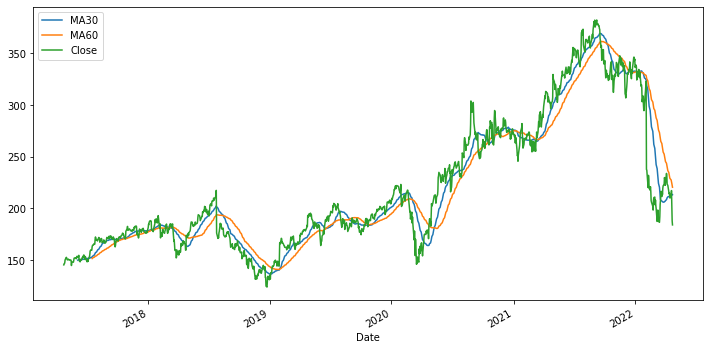

In [26]:
fb['ma30'] = fb['Close'].rolling(30).mean()
fb['ma60'] = fb['Close'].rolling(60).mean()#plot the moving average

#plot the moving average
plt.figure(figsize=(12, 6))
fb['ma30'].plot(label='MA30')
fb['ma60'].plot(label='MA60')
fb['Close'].plot(label='Close')
plt.legend()

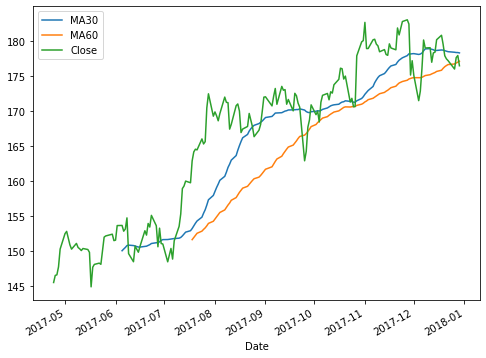

In [28]:
#특정 기간을 slicing한 이동평균 plot
plt.figure(figsize=(8, 6))
fb['ma30'].loc['2017-01-01':'2017-12-31'].plot(label='MA30')
fb['ma60'].loc['2017-01-01':'2017-12-31'].plot(label='MA60')
fb['Close'].loc['2017-01-01':'2017-12-31'].plot(label='Close')
plt.legend()
plt.show()

## EWMA (Exponentially-weighted moving average)


SMA(Simple Moving Average)에는 몇 가지 "약점"이 있습니다.
* window 가 작을수록 신호가 아닌 잡음이 증가합니다.
* 항상 window 크기만큼 지연됩니다.
* 평균화로 인해 데이터의 전체 피크 또는 계곡에 도달하지 않습니다.
* 미래의 움직임에 대해 실제로 알려주지 않습니다. 실제로는 데이터의 trend를 묘사하는 것입니다.
* 극단적인 historical value 로 인해 SMA가 크게 왜곡 될 수 있습니다.

이러한 문제를 해결하기 위해 EWMA (지수 가중 이동 평균)를 사용할 수 있습니다.

In [31]:
df = yf.download('AAPL', start='2020-01-01', end='2020-06-30', progress=False)
df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
df.head()

,Close
Date,
2019-12-31,73.412498
2020-01-02,75.087502
2020-01-03,74.357498
2020-01-06,74.949997
2020-01-07,74.597504


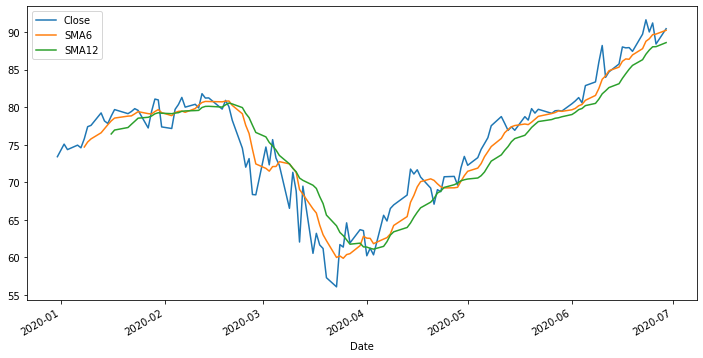

In [34]:
#SMA : Simple Moving Average

df['SMA6'] = df['Close'].rolling(window=6).mean()
df['SMA12'] = df['Close'].rolling(window=12).mean()
df.plot(figsize=(12, 6));

- EWMA를 사용하면 SMA의 지연 효과를 줄일 수 있으며 최근에 발생한 값에 더 많은 가중치를 적용합니다.  

- 가장 최근 값에 적용되는 가중치는 EWMA에 사용된 실제 매개 변수와 window 크기로 지정된 기간에 따라 다릅니다.

EWMA 공식은 다음과 같습니다.

$$ y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$$

$x_t$ 는 입력값, $w_i$ 는 적용된 weight (i=0 에서 t 사이로 변할 수 있음). $y_t$ 는 산출된 값입니다.

In [35]:
df['EWMA12'] = df['Close'].ewm(span=12).mean()
df.tail()

,Close,SMA6,SMA12,EWMA12
Date,,,,
2020-06-23,91.632500,88.771666,87.052082,87.036708
2020-06-24,90.014999,89.104167,87.606249,87.494907
2020-06-25,91.209999,89.656250,88.040624,88.066459
2020-06-26,88.407501,89.735416,88.057082,88.118927
2020-06-29,90.445000,90.237916,88.596249,88.476785


<AxesSubplot:xlabel='Date'>

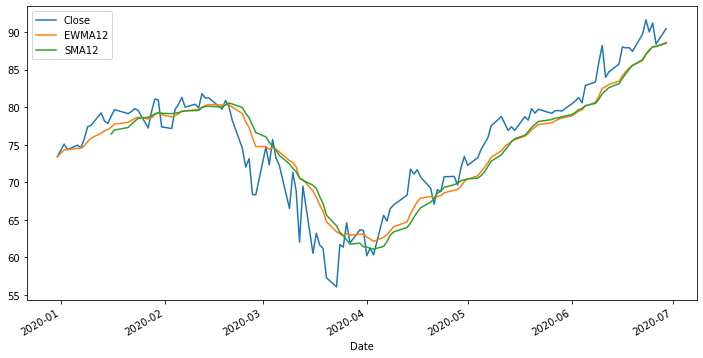

In [40]:
df[['Close', 'EWMA12', 'SMA12']].plot(figsize=(12, 6))

# 이동평균선을 이용한 Simple trading strategy 

- fast signal (단기 이동평균) 이 slow signal (장기 이동평균)위에 있으면 1 주 보유, 아래에 있으면 0 주 보유 전략  
- 종가에 매수, 매도 한다고 가정. 거래비용 없다고 가정.

- MA10 > MA50 : 1 주 보유 (매수 or hold), MA10 < MA40 : 0 주 보유 (매도 or no action)  
 
- Daily Profit 계산

- 누적 수익 계산

In [41]:
ms['MA10'] = ms['Close'].rolling(10).mean()
ms['MA50'] = ms['Close'].rolling(50).mean()
ms['Shares'] = [1 if ms.loc[day, 'MA10'] > ms.loc[day, 'MA50'] else 0 for day in ms.index]
ms.head()

,Close,Yesterday Close,Price Difference,Return,MA10,MA50,Shares
Date,,,,,,,
2017-04-24,67.529999,NaN,NaN,NaN,NaN,NaN,0
2017-04-25,67.919998,67.529999,0.389999,0.005775,NaN,NaN,0
2017-04-26,67.830002,67.919998,-0.089996,-0.001325,NaN,NaN,0
2017-04-27,68.269997,67.830002,0.439995,0.006487,NaN,NaN,0
2017-04-28,68.459999,68.269997,0.190002,0.002783,NaN,NaN,0


In [42]:
ms['NextDay Close'] = ms['Close'].shift(-1)
ms.head()

,Close,Yesterday Close,Price Difference,Return,MA10,MA50,Shares,NextDay Close
Date,,,,,,,,
2017-04-24,67.529999,NaN,NaN,NaN,NaN,NaN,0,67.919998
2017-04-25,67.919998,67.529999,0.389999,0.005775,NaN,NaN,0,67.830002
2017-04-26,67.830002,67.919998,-0.089996,-0.001325,NaN,NaN,0,68.269997
2017-04-27,68.269997,67.830002,0.439995,0.006487,NaN,NaN,0,68.459999
2017-04-28,68.459999,68.269997,0.190002,0.002783,NaN,NaN,0,69.410004


<AxesSubplot:xlabel='Date'>

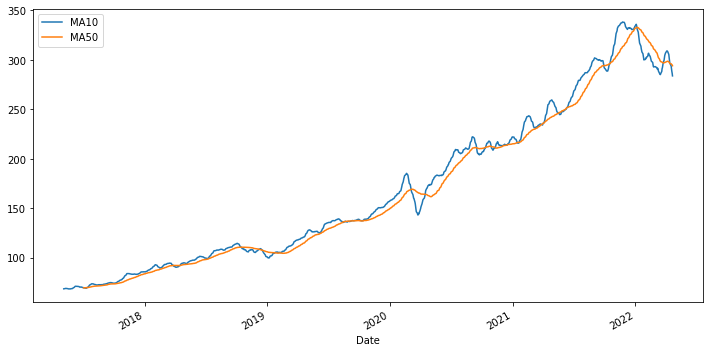

In [57]:
ms[['MA10', 'MA50']].plot(figsize=(12, 6))

## Daily Profit

In [58]:
# Daily Profit 계산
ms['Profit'] = [ms.loc[day, 'NextDay Close'] - ms.loc[day, 'Close'] 
                if ms.loc[day, 'Shares'] == 1 else 0 for day in ms.index]

ms.iloc[100:105]

,Close,Yesterday Close,Price Difference,Return,MA10,MA50,Shares,NextDay Close,Profit,wealth
Date,,,,,,,,,,
2017-09-14,74.769997,75.209999,-0.440002,-0.005850,74.346,72.928801,1,75.309998,0.540001,2.930000
2017-09-15,75.309998,74.769997,0.540001,0.007222,74.400,73.063601,1,75.160004,-0.149994,2.780006
2017-09-18,75.160004,75.309998,-0.149994,-0.001992,74.522,73.177601,1,75.440002,0.279999,3.060005
2017-09-19,75.440002,75.160004,0.279999,0.003725,74.705,73.286801,1,74.940002,-0.500000,2.560005
2017-09-20,74.940002,75.440002,-0.500000,-0.006628,74.859,73.385801,1,74.209999,-0.730003,1.830002


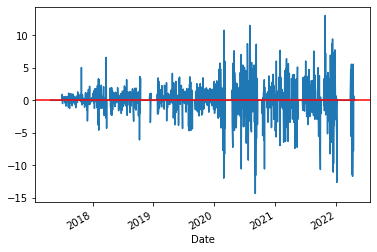

In [59]:
# red line 위쪽은 make money 아래는 lose money
ms['Profit'].plot()
plt.axhline(y=0, color='r')  

## 누적 수익

In [60]:
ms['wealth'] = ms['Profit'].cumsum()
ms.tail()

,Close,Yesterday Close,Price Difference,Return,MA10,MA50,Shares,NextDay Close,Profit,wealth
Date,,,,,,,,,,
2022-04-18,280.519989,279.829987,0.690002,0.002466,293.897998,296.060601,0,285.299988,0.0,82.969994
2022-04-19,285.299988,280.519989,4.779999,0.017040,290.930997,295.647800,0,286.359985,0.0,82.969994
2022-04-20,286.359985,285.299988,1.059998,0.003715,288.478995,295.356000,0,280.809998,0.0,82.969994
2022-04-21,280.809998,286.359985,-5.549988,-0.019381,286.609995,294.881000,0,274.029999,0.0,82.969994
2022-04-22,274.029999,280.809998,-6.779999,-0.024144,283.875995,294.137400,0,NaN,0.0,82.969994


이 전략으로 1825일 동안 번 수익 : 82.97 


<AxesSubplot:xlabel='Date'>

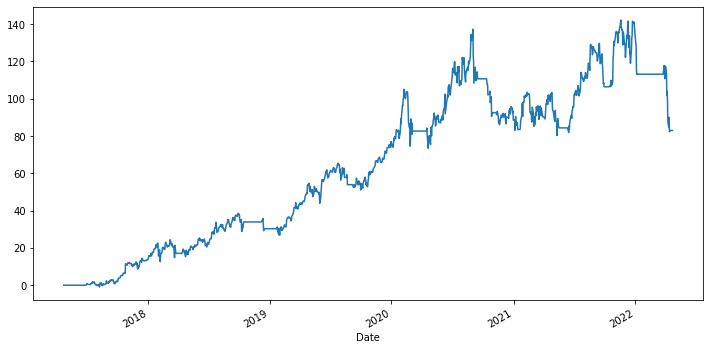

In [61]:
n_days = len(pd.date_range(ms.index[0], ms.index[-1]))

print(f"이 전략으로 {n_days}일 동안 번 수익 : {ms.loc[ms.index[-2], 'wealth']:.2f} ")

plt.figure(figsize=(12, 6))
ms['wealth'].plot()